## teste 3 -  MLPRegressor e RandomForestRegressor

**import libs**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.utils import check_array
from sklearn.ensemble import RandomForestRegressor

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

**read data**

In [2]:
sta1_data = pd.read_csv('./results-final-test3/processed_1.csv')
sta2_data = pd.read_csv('./results-final-test3/processed_2.csv')
sta3_data = pd.read_csv('./results-final-test3/processed_3.csv')

In [3]:
X_sta1 = sta1_data.loc[:, 'CPU_use':].to_numpy()
buffer_level_sta1 = sta1_data['bufferLevel'].to_numpy()
calculated_bitrate_sta1 = sta1_data['calculatedBitrate'].to_numpy()

X_sta2 = sta2_data.loc[:, 'CPU_use':].to_numpy()
buffer_level_sta2 = sta2_data['bufferLevel'].to_numpy()
calculated_bitrate_sta2 = sta2_data['calculatedBitrate'].to_numpy()

X_sta3 = sta3_data.loc[:, 'CPU_use':].to_numpy()
buffer_level_sta3 = sta3_data['bufferLevel'].to_numpy()
calculated_bitrate_sta3 = sta3_data['calculatedBitrate'].to_numpy()

### train: sta1, sta2 test: sta3

#### train and test models

In [4]:
X_train = np.concatenate([X_sta1, X_sta2])
bl_train = np.concatenate((buffer_level_sta1, buffer_level_sta2), axis=0)
cb_train = np.concatenate((calculated_bitrate_sta1, calculated_bitrate_sta2), axis=0)
print(X_train.shape, bl_train.shape, cb_train.shape)
X_test = X_sta3
bl_test = buffer_level_sta3
cb_test = calculated_bitrate_sta3
print(X_test.shape, bl_test.shape, cb_test.shape)

(1264, 7) (1264,) (1264,)
(633, 7) (633,) (633,)


In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_processed = scaler.transform(X_train)
X_test_processed = scaler.transform(X_test)

483.4808849355996


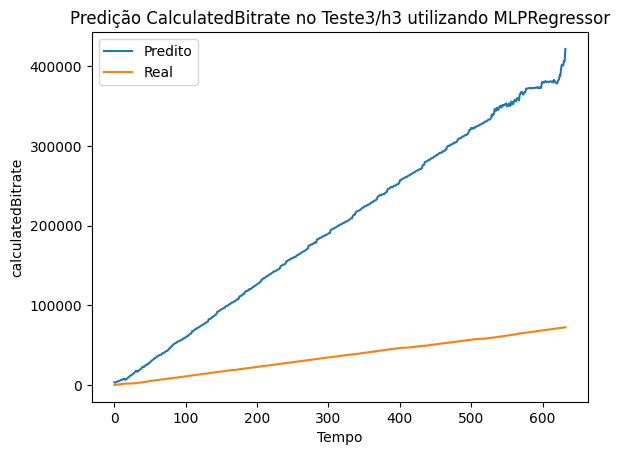

In [6]:
model = MLPRegressor(max_iter=30000).fit(X_processed, cb_train)
y_pred = model.predict(X_test_processed)
plt.plot(range(0, len(cb_test)), y_pred, label='Predito')
plt.plot(range(0, len(cb_test)), cb_test, label='Real')
plt.title('Predição CalculatedBitrate no Teste3/h3 utilizando MLPRegressor')
plt.xlabel('Tempo')
plt.ylabel('calculatedBitrate')
plt.legend()
print(mean_absolute_percentage_error(cb_test, y_pred))

/tmp/ipykernel_41640/812092155.py:12: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


inf


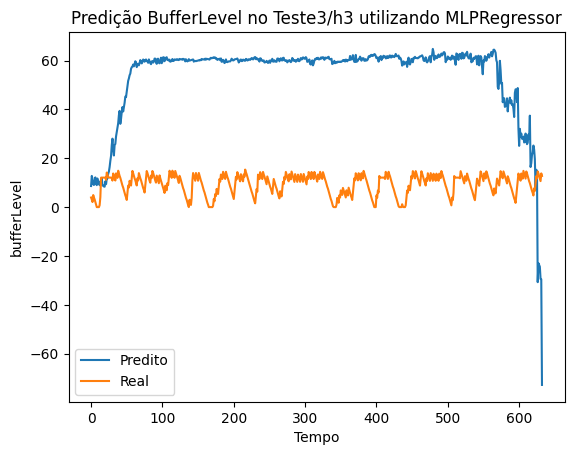

In [7]:
model = MLPRegressor(max_iter=30000).fit(X_processed, bl_train)
y_pred = model.predict(X_test_processed)
plt.plot(range(0, len(cb_test)), y_pred, label='Predito')
plt.plot(range(0, len(cb_test)), bl_test, label='Real')
plt.title('Predição BufferLevel no Teste3/h3 utilizando MLPRegressor')
plt.xlabel('Tempo')
plt.ylabel('bufferLevel')
plt.legend()
print(mean_absolute_percentage_error(bl_test, y_pred))

474.2611701016756


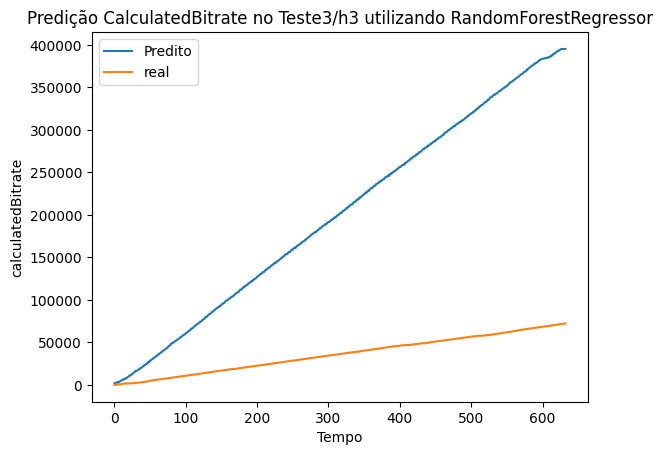

In [8]:
model = RandomForestRegressor().fit(X_processed, cb_train)
y_pred = model.predict(X_test_processed)
plt.plot(range(0, len(cb_test)), y_pred, label='Predito')
plt.plot(range(0, len(cb_test)), cb_test, label='real')
plt.title('Predição CalculatedBitrate no Teste3/h3 utilizando RandomForestRegressor')
plt.xlabel('Tempo')
plt.ylabel('calculatedBitrate')
plt.legend()
print(mean_absolute_percentage_error(cb_test, y_pred))

inf


/tmp/ipykernel_41640/812092155.py:12: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


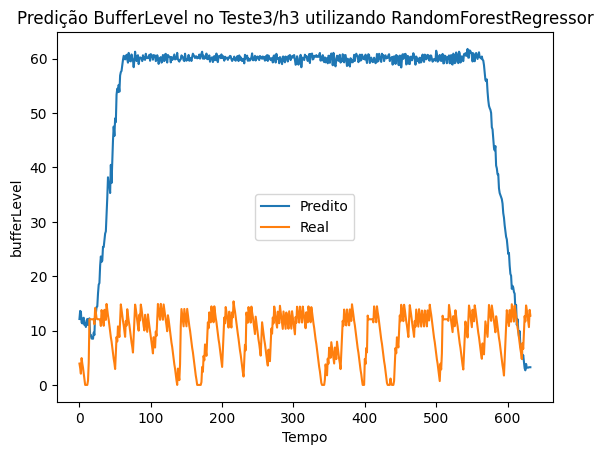

In [9]:
model = RandomForestRegressor().fit(X_processed, bl_train)
y_pred = model.predict(X_test_processed)
plt.plot(range(0, len(cb_test)), y_pred, label='Predito')
plt.plot(range(0, len(cb_test)), bl_test, label='Real')
plt.title('Predição BufferLevel no Teste3/h3 utilizando RandomForestRegressor')
plt.xlabel('Tempo')
plt.ylabel('bufferLevel')
plt.legend()
print(mean_absolute_percentage_error(bl_test, y_pred))

### train: sta1, sta3 test: sta2

In [10]:
X_train = np.concatenate([X_sta1, X_sta3])
bl_train = np.concatenate((buffer_level_sta1, buffer_level_sta3), axis=0)
cb_train = np.concatenate((calculated_bitrate_sta1, calculated_bitrate_sta3), axis=0)
print(X_train.shape, bl_train.shape, cb_train.shape)
X_test = X_sta2
bl_test = buffer_level_sta2
cb_test = calculated_bitrate_sta2
print(X_test.shape, bl_test.shape, cb_test.shape)

(1265, 7) (1265,) (1265,)
(632, 7) (632,) (632,)


In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_processed = scaler.transform(X_train)
X_test_processed = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30000) reached and the optimization hasn't converged yet.
  warnings.warn(


68.88962207701769


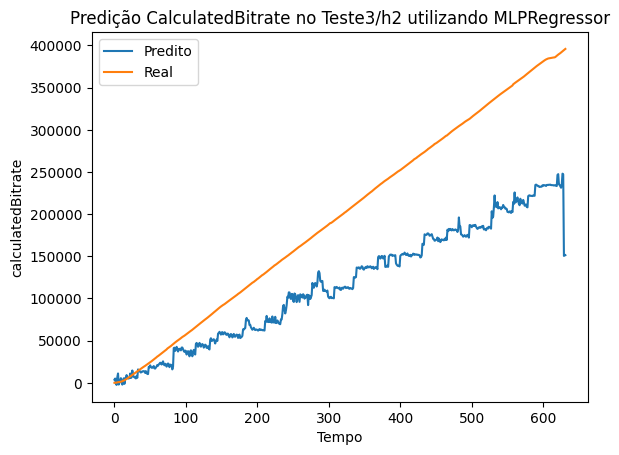

In [12]:
model = MLPRegressor(max_iter=30000).fit(X_processed, cb_train)
y_pred = model.predict(X_test_processed)
plt.plot(range(0, len(cb_test)), y_pred, label='Predito')
plt.plot(range(0, len(cb_test)), cb_test, label='Real')
plt.title('Predição CalculatedBitrate no Teste3/h2 utilizando MLPRegressor')
plt.xlabel('Tempo')
plt.ylabel('calculatedBitrate')
plt.legend()
print(mean_absolute_percentage_error(cb_test, y_pred))

51.873415829920646


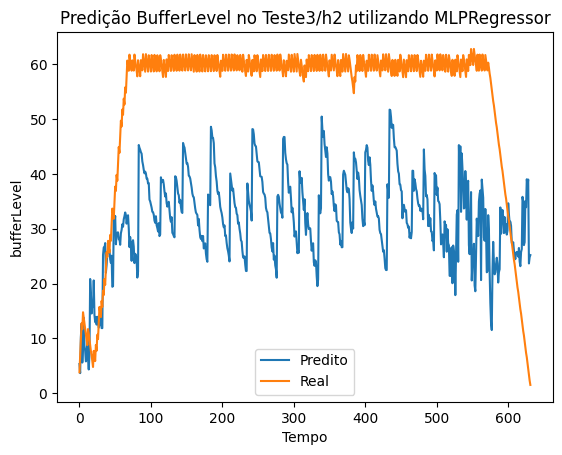

In [13]:
model = MLPRegressor(max_iter=30000).fit(X_processed, bl_train)
y_pred = model.predict(X_test_processed)
plt.plot(range(0, len(cb_test)), y_pred, label='Predito')
plt.plot(range(0, len(cb_test)), bl_test, label='Real')
plt.title('Predição BufferLevel no Teste3/h2 utilizando MLPRegressor')
plt.xlabel('Tempo')
plt.ylabel('bufferLevel')
plt.legend()
print(mean_absolute_percentage_error(bl_test, y_pred))

40.945467371677225


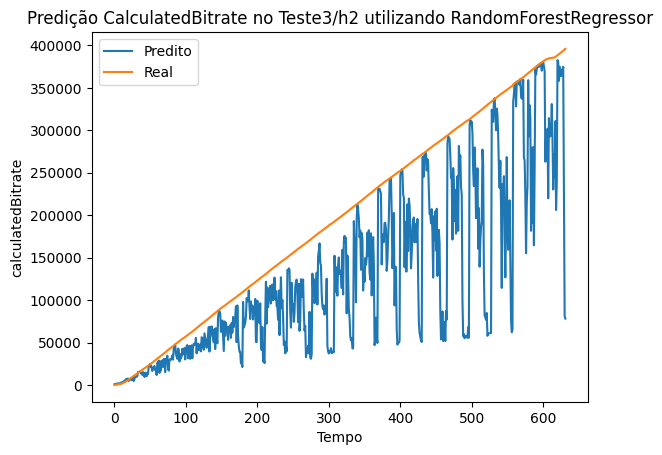

In [14]:
model = RandomForestRegressor().fit(X_processed, cb_train)
y_pred = model.predict(X_test_processed)
plt.plot(range(0, len(cb_test)), y_pred, label='Predito')
plt.plot(range(0, len(cb_test)), cb_test, label='Real')
plt.title('Predição CalculatedBitrate no Teste3/h2 utilizando RandomForestRegressor')
plt.xlabel('Tempo')
plt.ylabel('calculatedBitrate')
plt.legend()
print(mean_absolute_percentage_error(cb_test, y_pred))

37.032313645085395


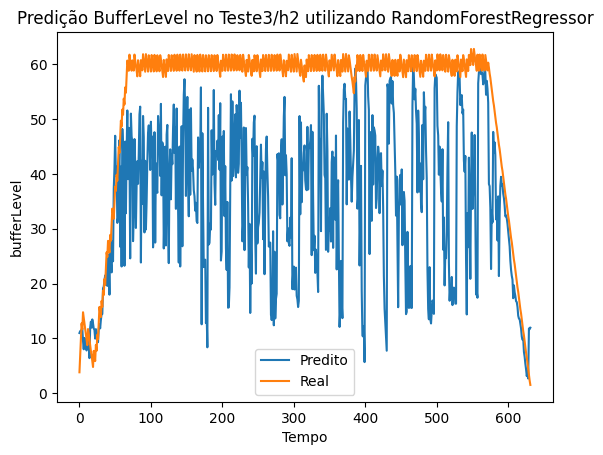

In [15]:
model = RandomForestRegressor().fit(X_processed, bl_train)
y_pred = model.predict(X_test_processed)
plt.plot(range(0, len(cb_test)), y_pred, label='Predito')
plt.plot(range(0, len(cb_test)), bl_test, label='Real')
plt.title('Predição BufferLevel no Teste3/h2 utilizando RandomForestRegressor')
plt.xlabel('Tempo')
plt.ylabel('bufferLevel')
plt.legend()
print(mean_absolute_percentage_error(bl_test, y_pred))

### train: sta2, sta3 test: sta1

In [16]:
X_train = np.concatenate([X_sta2, X_sta3])
bl_train = np.concatenate((buffer_level_sta2, buffer_level_sta3), axis=0)
cb_train = np.concatenate((calculated_bitrate_sta2, calculated_bitrate_sta3), axis=0)
print(X_train.shape, bl_train.shape, cb_train.shape)
X_test = X_sta1
bl_test = buffer_level_sta1
cb_test = calculated_bitrate_sta1
print(X_test.shape, bl_test.shape, cb_test.shape)

(1265, 7) (1265,) (1265,)
(632, 7) (632,) (632,)


In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_processed = scaler.transform(X_train)
X_test_processed = scaler.transform(X_test)

248.42820656933756


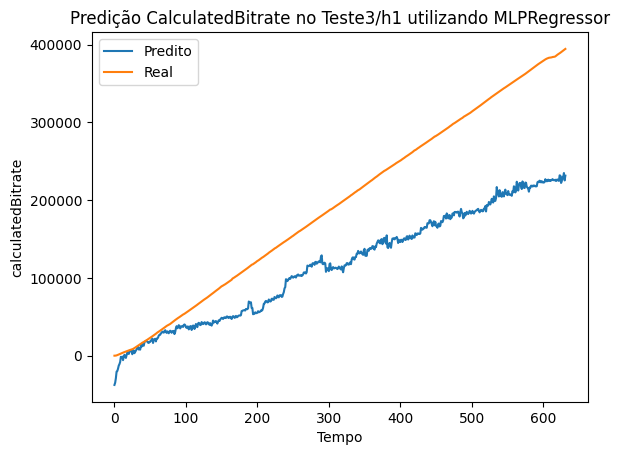

In [18]:
model = MLPRegressor(max_iter=30000).fit(X_processed, cb_train)
y_pred = model.predict(X_test_processed)
plt.plot(range(0, len(cb_test)), y_pred, label='Predito')
plt.plot(range(0, len(cb_test)), cb_test, label='Real')
plt.title('Predição CalculatedBitrate no Teste3/h1 utilizando MLPRegressor')
plt.xlabel('Tempo')
plt.ylabel('calculatedBitrate')
plt.legend()
print(mean_absolute_percentage_error(cb_test, y_pred))

53.0247540682568


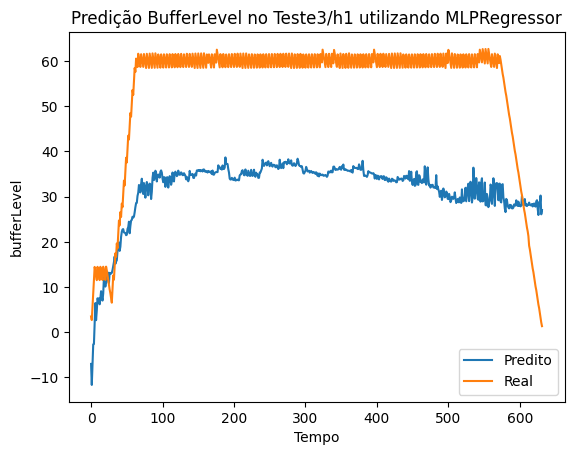

In [19]:
model = MLPRegressor(max_iter=30000).fit(X_processed, bl_train)
y_pred = model.predict(X_test_processed)
plt.plot(range(0, len(cb_test)), y_pred, label='Predito')
plt.plot(range(0, len(cb_test)), bl_test, label='Real')
plt.title('Predição BufferLevel no Teste3/h1 utilizando MLPRegressor')
plt.xlabel('Tempo')
plt.ylabel('bufferLevel')
plt.legend()
print(mean_absolute_percentage_error(bl_test, y_pred))

30.272327254564523


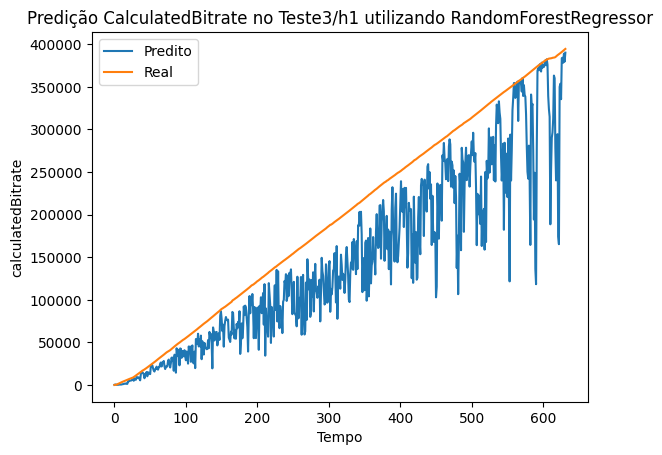

In [20]:
model = RandomForestRegressor().fit(X_processed, cb_train)
y_pred = model.predict(X_test_processed)
plt.plot(range(0, len(cb_test)), y_pred, label='Predito')
plt.plot(range(0, len(cb_test)), cb_test, label='Real')
plt.title('Predição CalculatedBitrate no Teste3/h1 utilizando RandomForestRegressor')
plt.xlabel('Tempo')
plt.ylabel('calculatedBitrate')
plt.legend()
print(mean_absolute_percentage_error(cb_test, y_pred))

32.287541226705294


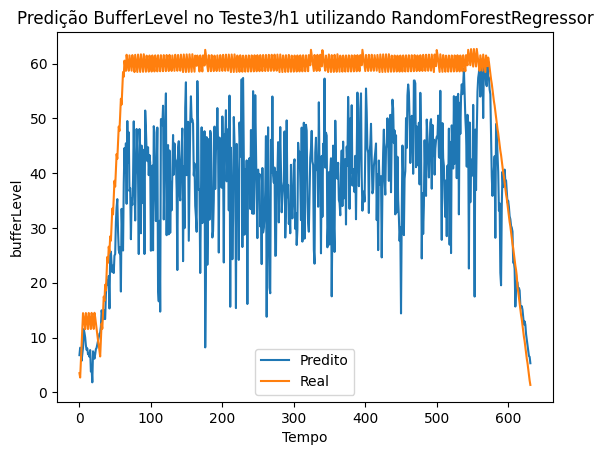

In [21]:
model = RandomForestRegressor().fit(X_processed, bl_train)
y_pred = model.predict(X_test_processed)
plt.plot(range(0, len(cb_test)), y_pred, label='Predito')
plt.plot(range(0, len(cb_test)), bl_test, label='Real')
plt.title('Predição BufferLevel no Teste3/h1 utilizando RandomForestRegressor')
plt.xlabel('Tempo')
plt.ylabel('bufferLevel')
plt.legend()
print(mean_absolute_percentage_error(bl_test, y_pred))